# MSDS696 Practicum 2 
## Fall 8W2 2020

### Exploration of Colorado County-Level Voting Patterns 2010 - 2020

#### James D. Reed (jreed011@regis.edu)

<img src="../img/Mountains2.jpg" width="700" height="200" />

## Process Voter Abstract Data for Presidential Elections 1952, 1956, 1960, 1964, 1968, 1972, 1980 and 2020


In [1]:
import requests
import pandas as pd
import geopandas as gpd
import censusdata
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import censusFunctions as cf
import abstractFunctions as af
from tabulate import tabulate

import os
%matplotlib inline

In [2]:
import os
import pickle
os.getcwd()

'/home/jdreed/MSDS696/notebooks'

In [3]:
from glob import glob
data_path = '../data/processed/abstracts/'
abfiles = glob(data_path + '*.xls*')
#print(abfiles)

file_dict = {1952: "../data/processed/abstracts/1952AbstractBook.xlsx", 
             1956: "../data/processed/abstracts/1956AbstractBook.xlsx", 
             1960: "../data/processed/abstracts/1960AbstractBook.xlsx", 
             1964: "../data/processed/abstracts/1964AbstractBook.xlsx", 
             1968: "../data/processed/abstracts/1968AbstractBook.xlsx", 
             1972: "../data/processed/abstracts/1972AbstractBook.xlsx", 
             1976: "../data/processed/abstracts/1976AbstractBook.xlsx", 
             1980: "../data/processed/abstracts/1980AbstractBook.xlsx",
             2020: "../data/processed/abstracts/2020president.xlsx"}


yr_list = ["1952", "1956", "1960", "1964", "1968", "1972", "1976", "1980", "2020"] 
maj_dict  = {int(yr):'../data/processed/abstracts/co_' + yr + '_majority.p' for yr in yr_list }

'''
for yr in yr_list:
    fn = file_dict[int(yr)]
    print(f'Majority file name: {fn}\n')
    dfi = cf.load_pickled_df(fn)
    gen_colorado_red_blue_map(dfi, yr + " General Election", yr)
#file_dict[1956]

'''


'\nfor yr in yr_list:\n    fn = file_dict[int(yr)]\n    print(f\'Majority file name: {fn}\n\')\n    dfi = cf.load_pickled_df(fn)\n    gen_colorado_red_blue_map(dfi, yr + " General Election", yr)\n#file_dict[1956]\n\n'

---
# 1952 General Election
## Presidential Voting Results in Colorado by County

In [4]:
# Define dataframe for status detail.
df_columns = ['No', 'County','Republican', 'Democrat', 'Progressive', 'Soc_Labor', 'Socialist', 'Constitution']

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = ['Republican', 'Democrat', 'Progressive', 'Soc_Labor', 'Socialist', 'Constitution']
df = pd.read_excel(file_dict[1952], sheet_name=0, header = None, index_col = None, skiprows = 1, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    #print(f'df[c][:63].sum() {df[c][:63].sum()}')
    ##print(f'df[c][64] {df[c][64]}\n\n')
    assert (df[c][:63].sum() == df[c][64]), f'Sum of votes for candidate and original do not match for {c}'
    
pres52_df = df.iloc[:63,1:6]
#print(f'President 1952: \n {tabulate(pres52_df, headers=["County", "Democrat", "Republican", "Labor", "Workers"])}\n\n')


df52 = pres52_df.copy(deep = True)
df52['Reppct'] = df52['Republican'] / (df52['Republican'] + df52['Democrat']) * 100
df52['Dempct'] = df52['Democrat'] / (df52['Republican'] + df52['Democrat']) * 100
df52['Majority'] = 'Republican'
df52.loc[df52['Dempct'] > 50, 'Majority'] = 'Democrat'


print(f' Republican Majority: \n{tabulate(df52[df52["Reppct"] > 50],df52.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df52[df52["Reppct"] < 50], df52.columns)}\n\n')

# Save Majority Report
df_maj_1952 = af.save_majority_report(df52, 1952)

dem_votes = df52['Democrat'].sum()
rep_votes = df52['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')


 Republican Majority: 
    County         Republican    Democrat    Progressive    Soc_Labor    Reppct    Dempct  Majority
--  -----------  ------------  ----------  -------------  -----------  --------  --------  ----------
 0  Adams                8995        7321             22            7   55.1299   44.8701  Republican
 1  Alamosa              2728        1626             20            3   62.655    37.345   Republican
 2  Arapahoe            15402        9843            120           18   61.0101   38.9899  Republican
 3  Archuleta             691         377              0            1   64.7004   35.2996  Republican
 4  Baca                 2122        1094              6            3   65.9826   34.0174  Republican
 5  Bent                 1950        1317              4            0   59.6878   40.3122  Republican
 6  Boulder             15069        7767            143           17   65.9879   34.0121  Republican
 7  Chaffee              2171        1643              4     

In [5]:
df_maj_1952

,County,Republican,Democrat,Progressive,Soc_Labor,Reppct,Dempct,Majority,CNTY_FIPS
0,Adams,8995.0,7321.0,22.0,7.0,55.129934,44.870066,Republican,001
1,Alamosa,2728.0,1626.0,20.0,3.0,62.655030,37.344970,Republican,003
2,Arapahoe,15402.0,9843.0,120.0,18.0,61.010101,38.989899,Republican,005
3,Archuleta,691.0,377.0,0.0,1.0,64.700375,35.299625,Republican,007
4,Baca,2122.0,1094.0,6.0,3.0,65.982587,34.017413,Republican,009
...,...,...,...,...,...,...,...,...,...
58,Summit,442.0,271.0,0.0,0.0,61.991585,38.008415,Republican,117
59,Teller,1042.0,572.0,1.0,0.0,64.560099,35.439901,Republican,119
60,Washington,2398.0,1009.0,2.0,2.0,70.384502,29.615498,Republican,121
61,Weld,18002.0,8890.0,21.0,11.0,66.941841,33.058159,Republican,123


## 1952 Majority by County

### Winner 1952 General Election for President

Colorado voted its electoral votes for Dwight Eisenhour and Richard M. Nixon.  The Republicans had a total of **379,782** votes versus the Democrat's **245,504**.  This represented **61%** to **39%.**

### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** in this election.  The number of Republican majority counties in this election is **50** and the number of Democrat majority counties is **13**.

{'Republican Majority': 58, 'Democrat Majority': 5}


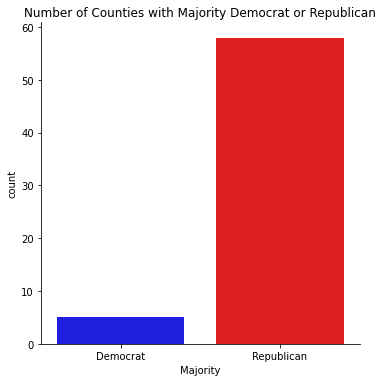

In [6]:
df52 = af.get_maj_counties(df52)

### Scatter Plot of County Republican versus Democratic Votes

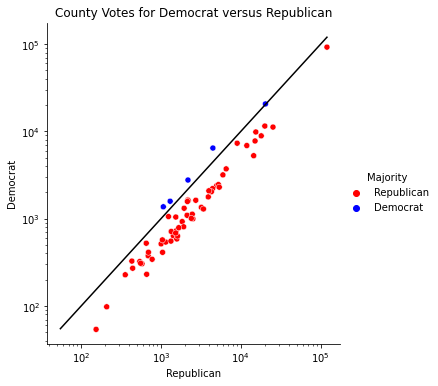

In [7]:
af.dem_vs_rep_scatter(df52)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


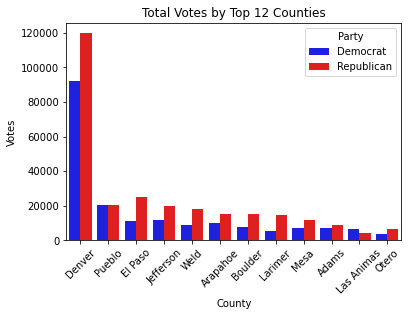

In [8]:
af.get_top_counties(df52, n = 12)

In [9]:
import pickle
pickle.dump(pres52_df, open('../data/processed/abstracts/pres52_df.p', "wb"))

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1952_majority.p

Democratic majority counties: ['Las Animas', 'Lake', 'Costilla', 'Pueblo', 'Huerfano']


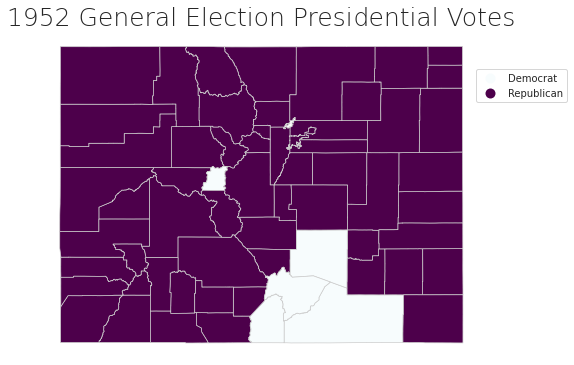

In [11]:

yr = "1952" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

---
# 1956 General Election
## Presidential Voting Results in Colorado by County

In [12]:
# Define dataframe for status detail.
df_columns = ['No.', 'County', 'Republican','Democrat','Progressive', 'Soc_Labor', 'Socialist']

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = ['Republican','Democrat', 'Progressive', 'Soc_Labor', 'Socialist']
df = pd.read_excel(file_dict[1956], sheet_name=0, header = None, index_col = None, skiprows = 1, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    #print(f'c: {c}')
    #print(f'df[c][:63].sum() {df[c][:63].sum()}')
    #print(f'df[c][64] {df[c][64]}\n\n')
    assert (df[c][:63].sum() == df[c][64]), f'Sum of votes for candidate and original do not match for {c}'

### Create Presidential Vote Data Frames
#### 1956 Majority by County

In [13]:
pres56_df = df.iloc[:63,1:7]
#print(pres56_df.shape)
#print(f'President 1956: \n {tabulate(pres56_df, headers=["County", "Republican","Democrat", \
#                        "Progressive", "Soc_Labor", "Socialist"])}\n\n')

df56 = pres56_df.copy(deep = True)
df56['Reppct'] = df56['Republican'] / (df56['Republican'] + df56['Democrat']) * 100
df56['Dempct'] = df56['Democrat'] / (df56['Republican'] + df56['Democrat']) * 100
df56['Majority'] = 'Republican'
df56.loc[df56['Dempct'] > 50, 'Majority'] = 'Democrat'


print(f' Republican Majority: \n{tabulate(df56[df56["Reppct"] > 50],df56.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df56[df56["Reppct"] < 50], df56.columns)}\n\n')

# Save Majority Report
df_maj_1956 = af.save_majority_report(df56, 1956)

dem_votes = df56['Democrat'].sum()
rep_votes = df56['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

 Republican Majority: 
    County         Republican    Democrat    Progressive    Soc_Labor    Socialist    Reppct    Dempct  Majority
--  -----------  ------------  ----------  -------------  -----------  -----------  --------  --------  ----------
 0  Adams               12778       11470            200           15            0   52.6971   47.3029  Republican
 1  Alamosa              2442        1465              7            4            0   62.5032   37.4968  Republican
 2  Arapahoe            19716       11351            157           15            4   63.4628   36.5372  Republican
 3  Archuleta             635         423              0            2            0   60.0189   39.9811  Republican
 4  Baca                 1715        1150              8            3            0   59.8604   40.1396  Republican
 5  Bent                 1718        1283              0            0            0   57.2476   42.7524  Republican
 6  Boulder             16748        8149            121   

## 1956 Majority by County

### Winner 1956 General Election for President

Colorado voted its electoral votes for Dwight Eisenhour and Richard M. Nixon for a second term.  The Republicans had a total of **392,390** votes versus the Democrat's **263,997**.  This represented **59.78%** to **40.22%.**

### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** in this election.  The number of Republican majority counties in this election is **61** and the number of Democrat majority counties is **2**.

{'Republican Majority': 61, 'Democrat Majority': 2}


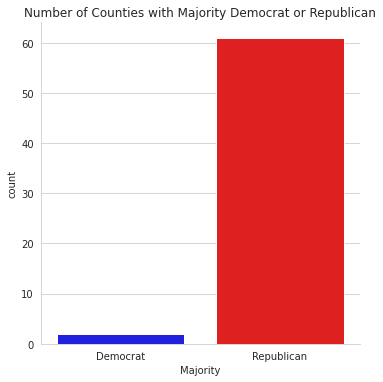

In [14]:
df56 = af.get_maj_counties(df56)

### Scatter Plot of County Republican versus Democratic Votes

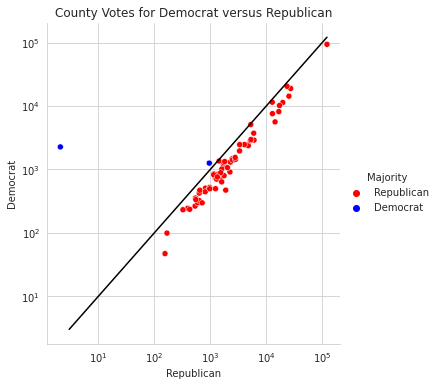

In [15]:
af.dem_vs_rep_scatter(df56)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


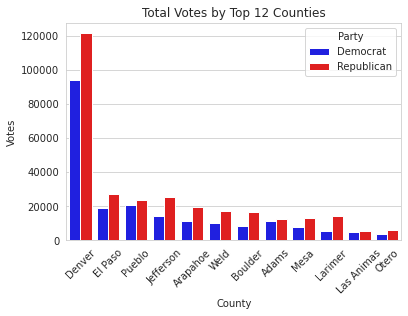

In [16]:
af.get_top_counties(df56, n = 12)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1956_majority.p

Democratic majority counties: ['Costilla', 'Huerfano']


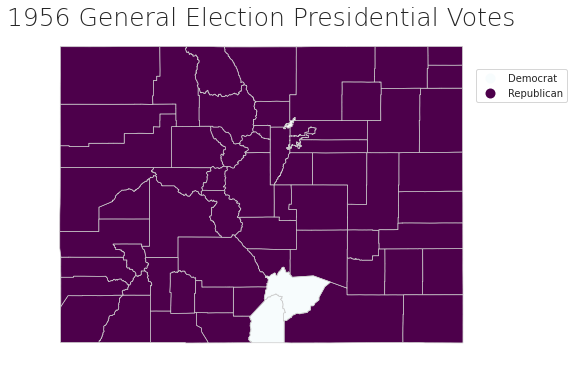

In [17]:
yr = "1956" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [18]:
import pickle
pickle.dump(pres56_df, open('../data/processed/abstracts/pres56_df.p', "wb"))

---
# 1960 General Election
## Presidential Voting Results in Colorado by County

### 1960 Majority by County

In [19]:
pres60_df = df.iloc[:63,1:6]
#print(f'President 1960: \n {tabulate(pres60_df, headers=["County", "Democrat", "Republican", "Labor", "Workers"])}\n\n')

# Define dataframe for status detail.
df_columns = ['No.', 'County', 'Democrat', 'Republican', 'Labor', 'Working', 'skip', 'S_Republican', 'S_Democrat', 'S_Ind']

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = ['Democrat', 'Republican', 'Labor', 'Working', 'S_Republican', 'S_Democrat', 'S_Ind']
df = pd.read_excel(file_dict[1960], sheet_name=0, header = None, index_col = None, skiprows = 2, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    assert (df[c][:63].sum() == df[c][64]), f'Sum of votes for candidate and original do not match for {c}'
    
df60 = pres60_df.copy(deep = True)
df60['Reppct'] = df60['Republican'] / (df60['Republican'] + df60['Democrat']) * 100
df60['Dempct'] = df60['Democrat'] / (df60['Republican'] + df60['Democrat']) * 100
df60['Majority'] = 'Republican'
df60.loc[df60['Dempct'] > 50, 'Majority'] = 'Democrat'


print(f' Republican Majority: \n{tabulate(df60[df60["Reppct"] > 50],df60.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df60[df60["Reppct"] < 50], df60.columns)}\n\n')

# Save Majority Report
df_maj_1960 = af.save_majority_report(df60, 1960)

dem_votes = df60['Democrat'].sum()
rep_votes = df60['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

 Republican Majority: 
    County         Republican    Democrat    Progressive    Soc_Labor    Reppct    Dempct  Majority
--  -----------  ------------  ----------  -------------  -----------  --------  --------  ----------
 0  Adams               12778       11470            200           15   52.6971   47.3029  Republican
 1  Alamosa              2442        1465              7            4   62.5032   37.4968  Republican
 2  Arapahoe            19716       11351            157           15   63.4628   36.5372  Republican
 3  Archuleta             635         423              0            2   60.0189   39.9811  Republican
 4  Baca                 1715        1150              8            3   59.8604   40.1396  Republican
 5  Bent                 1718        1283              0            0   57.2476   42.7524  Republican
 6  Boulder             16748        8149            121           21   67.2691   32.7309  Republican
 7  Chaffee              2284        1303              0     

## 1960 Majority by County

### Winner 1960 General Election for President

Colorado voted its electoral votes for Richard M. Nixon and Henry Cabot Lodge.  The Republicans had a total of **392,390** votes versus the Democrat's **263,997**.  This represented **60%** to **40%.**

### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** in this election.  The number of Republican majority counties in this election is **50** and the number of Democrat majority counties is **13**.

{'Republican Majority': 61, 'Democrat Majority': 2}


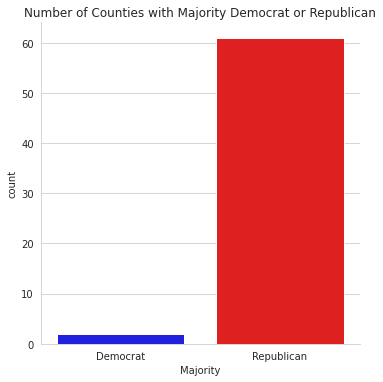

In [20]:
df60 = af.get_maj_counties(df60)

### Scatter Plot of County Republican versus Democratic Votes

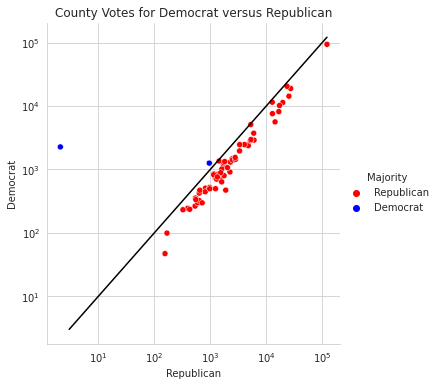

In [21]:
af.dem_vs_rep_scatter(df60)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


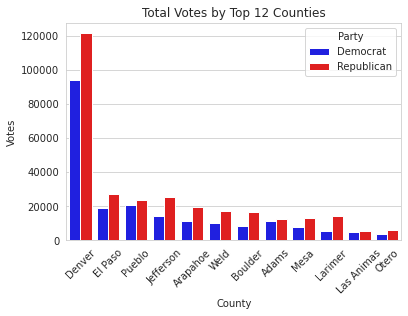

In [22]:
af.get_top_counties(df60, n = 12)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1960_majority.p

Democratic majority counties: ['Costilla', 'Huerfano']


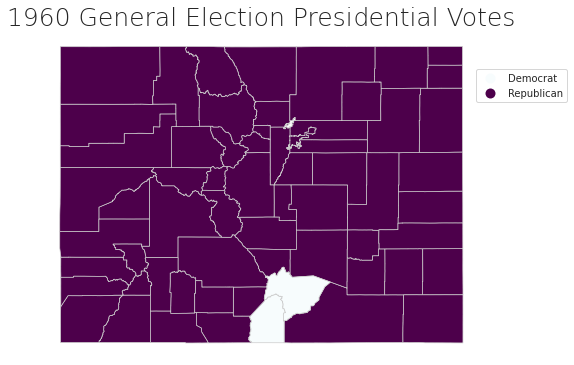

In [23]:
yr = "1960" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [24]:
import pickle
pickle.dump(pres60_df, open('../data/processed/abstracts/pres60_df.p', "wb"))

---
# 1964 General Election
## Presidential Voting Results in Colorado by County

In [25]:
# Define dataframe for status detail.
df_columns = ['No.', 'County', "Republican", "Democrat", "Social_Work", "Social_Labor"]

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = df_columns[2:]
df = pd.read_excel(file_dict[1964], sheet_name=0, header = None, index_col = None, skiprows = 1, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    assert (df[c][:63].sum() == df[c][64]), f'Sum of votes for candidate and original do not match for {c}'
    
pres64_df = df.iloc[:63,1:6]
#print(f'President 1964: \n {tabulate(pres64_df, headers=["County", "Republican", "Democrat", "Social Work", "Social Labor"])}\n\n')

df64 = pres64_df.copy(deep = True)
df64['Reppct'] = df64['Republican'] / (df64['Republican'] + df64['Democrat']) * 100
df64['Dempct'] = df64['Democrat'] / (df64['Republican'] + df64['Democrat']) * 100
df64['Majority'] = 'Republican'
df64.loc[df64['Dempct'] > 50, 'Majority'] = 'Democrat'


print(f' Republican Majority: \n{tabulate(df64[df64["Reppct"] > 50],df64.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df64[df64["Reppct"] < 50], df64.columns)}\n\n')

# Save Majority Report
df_maj_1964 = af.save_majority_report(df64, 1964)

dem_votes = df64['Democrat'].sum()
rep_votes = df64['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

 Republican Majority: 
    County        Republican    Democrat    Social_Work    Social_Labor    Reppct    Dempct  Majority
--  ----------  ------------  ----------  -------------  --------------  --------  --------  ----------
19  Elbert               924         857              0               0   51.881    48.119   Republican
26  Hinsdale             107          94              0               0   53.2338   46.7662  Republican
60  Washington          1434        1341              0               0   51.6757   48.3243  Republican


 Democrat Majority: 
    County         Republican    Democrat    Social_Work    Social_Labor    Reppct    Dempct  Majority
--  -----------  ------------  ----------  -------------  --------------  --------  --------  ----------
 0  Adams               15652       35498            218              22   30.6002   69.3998  Democrat
 1  Alamosa              1488        2481              1               1   37.4906   62.5094  Democrat
 2  Arapahoe          

## 1964 General Election Results

### Winner 1964 General Election for President

Colorado voted its electoral votes for Lyndon Johnson and Hubert H. Humphrey.  The Democrats had a total of **476,024** votes versus the Republican's **296,767**.  This represented **62%** to **38%.**  

### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** in this election.  The number of Republican majority counties in this election is **3** and the number of Democrat majority counties is **60**.

{'Republican Majority': 3, 'Democrat Majority': 60}


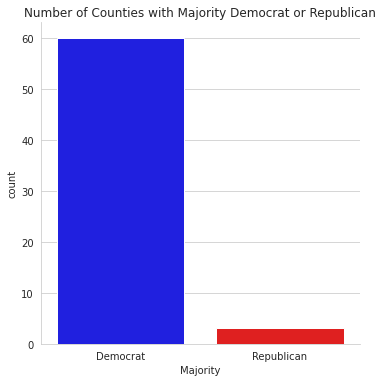

In [26]:
df64 = af.get_maj_counties(df64)

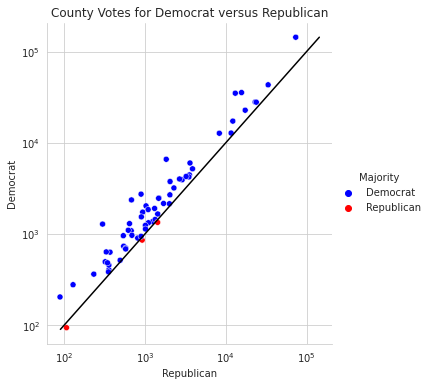

In [27]:
af.dem_vs_rep_scatter(df64)

(126, 3)


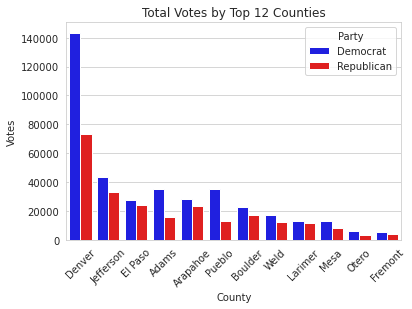

In [28]:
af.get_top_counties(df64, n = 12)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1964_majority.p

Republican majority counties: ['Elbert', 'Hinsdale', 'Washington']


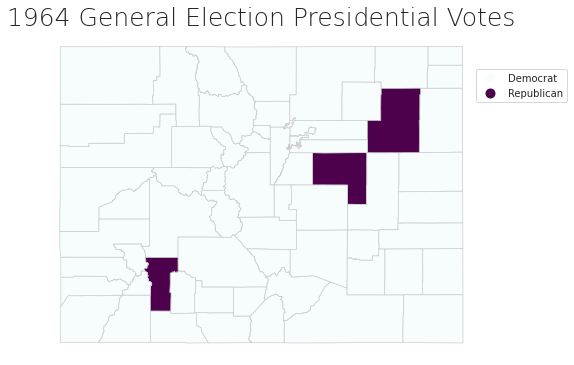

In [29]:
yr = "1964" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [30]:
import pickle
pickle.dump(pres64_df, open('../data/processed/abstracts/pres64_df.p', "wb"))

---
# 1968 General Election
## Presidential Voting Results in Colorado by County

### 1968 Majority by County

In [31]:
# Define dataframe for status detail.
del(df_columns, df)
df_columns = ['No.', 'County', "Democrat", "Republican", "Social_Labor", "New_Party", "Soc_Workers", "Prohibition", "American_Ind", "Misc"]
print(df_columns)

['No.', 'County', 'Democrat', 'Republican', 'Social_Labor', 'New_Party', 'Soc_Workers', 'Prohibition', 'American_Ind', 'Misc']


In [32]:
# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = df_columns[2:-1]
df = pd.read_excel(file_dict[1968], sheet_name=0, header = None, index_col = None, skiprows = 1, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    #print(f'c: {c}')
    #print(f'df[c][:63].sum() {df[c][:63].sum()}')
    #print(f'df[c][65] {df[c][65]}\n\n')
    assert (df[c][:63].sum() == df[c][65]), f'Sum of votes for candidate and original do not match for {c}'

print(df.shape)

pres68_df = df.iloc[:63,1:-1]
#print(f'President 1968: \n {tabulate(pres68_df, headers=["County", "Democrat", "Republican", "Social_Labor", "New_Party", "Soc_Workers", "Prohibition", "American_Ind"])}\n\n')

df68 = pres68_df.copy(deep = True)
df68['Reppct'] = df68['Republican'] / (df68['Republican'] + df68['Democrat']) * 100
df68['Dempct'] = df68['Democrat'] / (df68['Republican'] + df68['Democrat']) * 100
df68['Majority'] = 'Republican'
df68.loc[df68['Dempct'] > 50, 'Majority'] = 'Democrat'


print(f' Republican Majority: \n{tabulate(df68[df68["Reppct"] > 50], df68.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df68[df68["Reppct"] < 50], df68.columns)}\n\n')

# Save Majority Report
df_maj_1968 = af.save_majority_report(df68, 1968)

dem_votes = df68['Democrat'].sum()
rep_votes = df68['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

(66, 10)
 Republican Majority: 
    County         Democrat    Republican    Social_Labor    New_Party    Soc_Workers    Prohibition    American_Ind    Reppct    Dempct  Majority
--  -----------  ----------  ------------  --------------  -----------  -------------  -------------  --------------  --------  --------  ----------
 1  Alamosa            1574          2277               1            1              0              0             287   59.1275   40.8725  Republican
 2  Arapahoe          18569         33172             175           80             11             19            3953   64.1116   35.8884  Republican
 3  Archuleta           409           486               0            0              0              0              83   54.3017   45.6983  Republican
 4  Baca                719          1441               1            1              1              1             340   66.713    33.287   Republican
 5  Bent               1126          1228               0            1      

### Winner 1968 General Election for President

Colorado cast its electoral votes for **Richard M. Nixon and Spiro T. Agnew** in 1968.  The _Republicans_ had a total of **408,785** votes versus the _Democrat's_ **335,174**.  This represented **55%** to **45%.** split. 

### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** again in this election.  The number of Republican majority counties in this election is **54** and the number of Democrat majority counties is **9**.

{'Republican Majority': 54, 'Democrat Majority': 9}


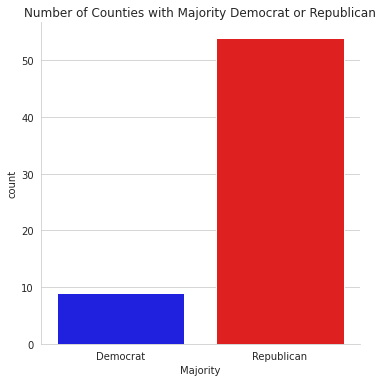

In [33]:
df68 = af.get_maj_counties(df68)

### Scatter Plot of County Republican versus Democratic Votes

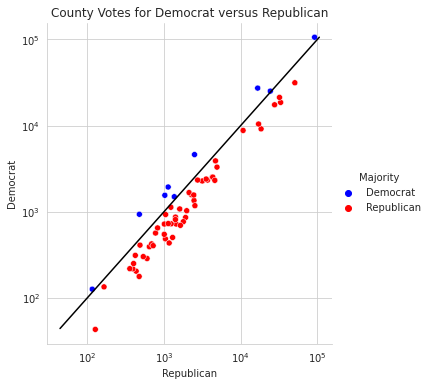

In [34]:
af.dem_vs_rep_scatter(df68)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


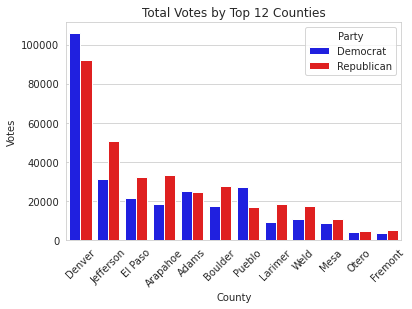

In [35]:
af.get_top_counties(df68)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1968_majority.p

Democratic majority counties: ['Las Animas', 'Conejos', 'Adams', 'Lake', 'Costilla', 'Mineral', 'Pueblo', 'Denver', 'Huerfano']


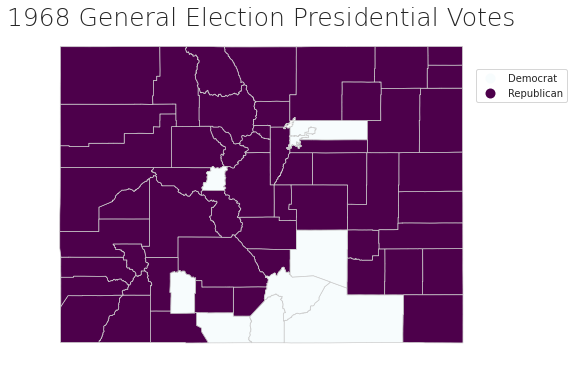

In [36]:
yr = "1968" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [37]:
import pickle
pickle.dump(pres68_df, open('../data/processed/abstracts/pres68_df.p', "wb"))

---
# 1972 General Election
## Presidential Voting Results in Colorado by County

In [38]:
# Define dataframe for status detail.
df_columns = ['No.','County', "Democrat", "Republican", "Social_Labor", "Communist", "Libertarian", "Social_Workers", "Prohibition","American", "Peoples"]

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = df_columns[2:]
#print(f'vote_cols: {vote_cols}')
df = pd.read_excel(file_dict[1972], sheet_name=0, header = None, index_col = None, skiprows = 1, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    assert (df[c][:63].sum() == df[c][65]), f'Sum of votes for candidate and original do not match for {c}'
    
pres72_df = df.iloc[:63,:]
df72 = pres72_df.copy(deep = True)
df72['Reppct'] = df72['Republican'] / (df72['Republican'] + df72['Democrat']) * 100
df72['Dempct'] = df72['Democrat'] / (df72['Republican'] + df72['Democrat']) * 100
df72['Majority'] = 'Republican'
df72.loc[df72['Dempct'] > 50, 'Majority'] = 'Democrat'


print(f' Republican Majority: \n{tabulate(df72[df72["Reppct"] > 50], df72.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df72[df72["Reppct"] < 50], df72.columns)}\n\n')

# Save Majority Report
df_maj_1972 = af.save_majority_report(df72, 1972)


dem_votes = df72['Democrat'].sum()
rep_votes = df72['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

 Republican Majority: 
      No.  County         Democrat    Republican    Social_Labor    Communist    Libertarian    Social_Workers    Prohibition    American    Peoples    Reppct    Dempct  Majority
--  -----  -----------  ----------  ------------  --------------  -----------  -------------  ----------------  -------------  ----------  ---------  --------  --------  ----------
 0      1  Adams             24170         40372             431           36             72                43             29        1133        126   62.5515   37.4485  Republican
 1      2  Alamosa            1540          2916               1            1              3                 3              1         191          9   65.4399   34.5601  Republican
 2      3  Arapahoe          18631         52283             357           14             75                28             29         816        143   73.7273   26.2727  Republican
 3      4  Archuleta           300           606               0          

### Winner 1972 General Election for President

Colorado cast its electoral votes for **Richard M. Nixon and Spiro T. Agnew** in 1972.  The _Republicans_ had a total of **597,189** votes versus the _Democrat's_ **329,980**.  This represented **64%** to **36%.** split. Colorado was not alone, Nixon carried 49 states.  McGovern carried only one state (MA) and DC and lost with a 37.5% to 60.7% spread.

### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** again in this election.  The number of Republican majority counties in this election is **61** and the number of Democrat majority counties is **2**.

{'Republican Majority': 61, 'Democrat Majority': 2}


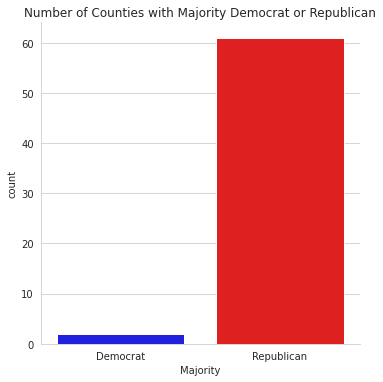

In [39]:
df72 = af.get_maj_counties(df72)

### Scatter Plot of County Republican versus Democratic Votes

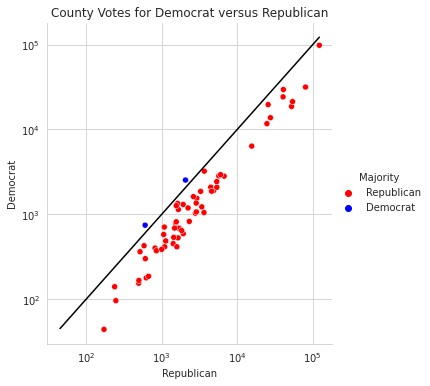

In [40]:
af.dem_vs_rep_scatter(df72)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


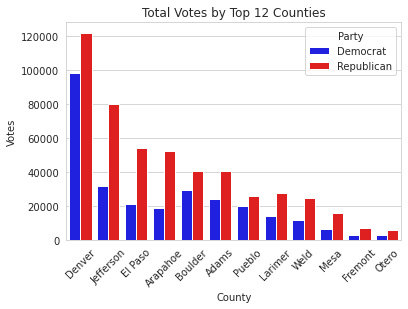

In [41]:
af.get_top_counties(df72)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1972_majority.p

Democratic majority counties: ['Pitkin', 'Costilla']


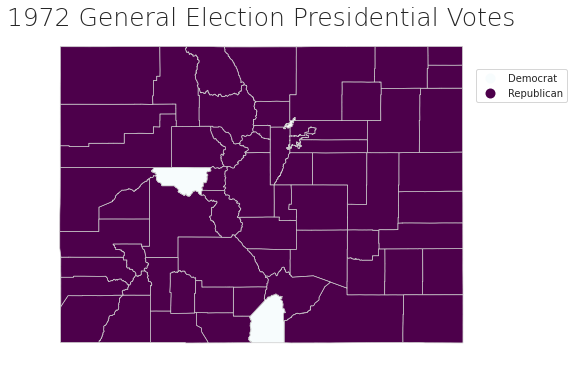

In [42]:
yr = "1972" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [43]:
import pickle
pickle.dump(pres72_df, open('../data/processed/abstracts/pres72_df.p', "wb"))

---
# 1976 General Election
## Presidential Voting Results in Colorado by County
### Create Presidential Election Vote Data Frame

 Republican Majority: 
    County         Democrat    Republican    prohibition    cocial_labor    communist    labor    libertarian    independent    Reppct    Dempct  Majority
--  -----------  ----------  ------------  -------------  --------------  -----------  -------  -------------  -------------  --------  --------  ----------
 1  Alamosa            2052          2599              1               6            3        2             15            179   55.8805   44.1195  Republican
 2  Arapahoe          33685         63154            392              49           22       27            449           1748   65.2155   34.7845  Republican
 3  Archuleta           632           768            nan             nan          nan        2              1             29   54.8571   45.1429  Republican
 4  Baca               1164          1303              1             nan          nan        1             10             28   52.8172   47.1828  Republican
 6  Boulder           33284         4

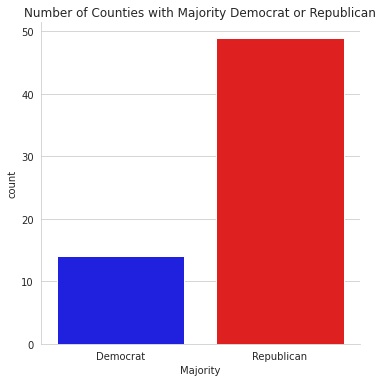

In [44]:
# Define dataframe for status detail.
df_columns = ['No.', 'County','skip', 'skip2', 'Democrat','Republican','prohibition', 'cocial_labor', 'communist', 'labor', 'libertarian', 'independent']

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = df_columns[4:]
df = pd.read_excel(file_dict[1976], sheet_name=0, header = None, index_col = None, skiprows = 1, 
        usecols = range(len(df_columns)), names = df_columns)
#print(df_columns)
#print(vote_cols)
for c in vote_cols:
    #print(f'Candidate:\t{c}')
    #print(f'{df[c][:63].sum()}')
    #print(f'{df[c][65]}')
    assert (df[c][:63].sum() == df[c][65]), f'Sum of votes for candidate and original do not match for {c}'
    
# Calculate Total Votes Cast for President

total_pres_votes = df.loc[:63,vote_cols].sum().sum()
county_pres_votes = df.loc[:63,vote_cols].sum(axis = 1)
#county_pres_votes

pres76_df = df.iloc[0:63,[1,4,5,6,7,8,9,10,11]]
#print(f"President 1976: \n {tabulate(pres76_df, headers=['County', 'Democrat', 'Republican', 'new', 'soc', 'labor', 'communist', 'main', 'workers'])}\n\n")

df76 = pres76_df.copy(deep = True)
dem_votes = df76['Democrat'].sum()
rep_votes = df76['Republican'].sum()

df76 = pres76_df.copy(deep = True)
df76['Reppct'] = df76['Republican'] / (df76['Republican'] + df76['Democrat']) * 100
df76['Dempct'] = df76['Democrat'] / (df76['Republican'] + df76['Democrat']) * 100
df76['Majority'] = 'Republican'
df76.loc[df76['Dempct'] > 50, 'Majority'] = 'Democrat'

print(f' Republican Majority: \n{tabulate(df76[df76["Reppct"] > 50], df76.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df76[df76["Reppct"] < 50], df76.columns)}\n\n')

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

# Save Majority Report
df_maj_1976 = af.save_majority_report(df76, 1976)

df76 = pres76_df.copy(deep = True)
df76 = af.get_maj_counties(df76)

### 1976 Majority by County

#### Winner 1976 General Election for President

Colorado will cast its electoral votes for **Ronald Regan and George Bush** for 1980.  The _Republicans_ had a total of **584,367** votes versus the _Democrat's_ **460,353**.  This represented **65%** to **44%.** split. 

#### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** again in this election.  The number of Republican majority counties in this election is **49** and the number of Democrat majority counties is **14**.

### Scatter Plot of County Republican versus Democratic Votes

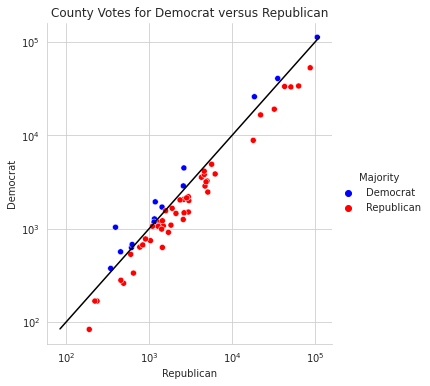

In [45]:
af.dem_vs_rep_scatter(df76)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


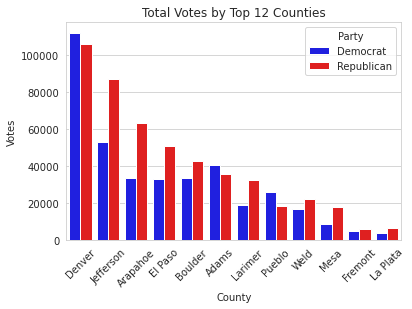

In [46]:
af.get_top_counties(df76, n = 12)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1976_majority.p

Democratic majority counties: ['Las Animas', 'Conejos', 'Cheyenne', 'Bent', 'Adams', 'Costilla', 'Prowers', 'San Miguel', 'Phillips', 'Dolores', 'Pueblo', 'Gilpin', 'Denver', 'Huerfano']


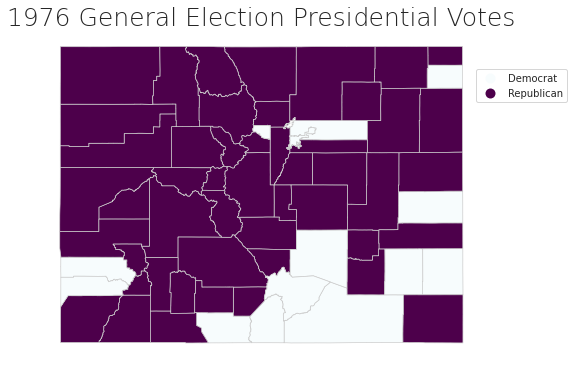

In [47]:
yr = "1976" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [48]:
import pickle
pickle.dump(pres76_df, open('../data/processed/abstracts/pres76_df.p', "wb"))

---
# 1980 General Election
## Presidential Voting Results in Colorado by County

In [49]:
# Define dataframe for status detail.
df_columns = ['No.', 'County','skip', 'skip2', 'Democrat','Republican','new', 'soc', 'labor', 'communist', 'main', 'workers']

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = df_columns[4:]
df = pd.read_excel(file_dict[1980], sheet_name=0, header = None, index_col = None, skiprows = 1, 
        usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    assert (df[c][:63].sum() == df[c][65]), f'Sum of votes for candidate and original do not match for {c}'

total_pres_votes = df.loc[:63,vote_cols].sum().sum()
county_pres_votes = df.loc[:63,vote_cols].sum(axis = 1)
    
pres80_df = df.iloc[0:63,[1,4,5,6,7,8,9,10,11]]
#print(f"President 1980: \n {tabulate(pres80_df, headers=['County', 'Democrat', 'Republican', 'new', 'soc', 'labor', 'communist', 'main', 'workers'])}\n\n")

#county_pres_votes
df80 = pres80_df.copy(deep = True)
df80['Reppct'] = df80['Republican'] / (df80['Republican'] + df80['Democrat']) * 100
df80['Dempct'] = df80['Democrat'] / (df80['Republican'] + df80['Democrat']) * 100
df80['Majority'] = 'Republican'
df80.loc[df80['Dempct'] > 50, 'Majority'] = 'Democrat'

print(f' Republican Majority: \n{tabulate(df80[df80["Reppct"] > 50], df80.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df80[df80["Reppct"] < 50], df80.columns)}\n\n')

dem_votes = df80['Democrat'].sum()
rep_votes = df80['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

# Save Majority Report
df_maj_1980 = af.save_majority_report(df80, 1980)

 Republican Majority: 
    County         Democrat    Republican    new    soc    labor    communist    main    workers    Reppct    Dempct  Majority
--  -----------  ----------  ------------  -----  -----  -------  -----------  ------  ---------  --------  --------  ----------
 0  Adams             31357         42916   8342    102     2044          171      20         23   57.7814   42.2186  Republican
 1  Alamosa            1821          2601    289    nan       96           19     nan          2   58.8195   41.1805  Republican
 2  Arapahoe          30148         79594  15329    254     2307          264      24         40   72.5283   27.4717  Republican
 3  Archuleta           532          1252     83    nan       30            3     nan        nan   70.1794   29.8206  Republican
 4  Baca                551          1999    106    nan       35            1     nan        nan   78.3922   21.6078  Republican
 5  Bent                894          1206    164     13       42            

### 1980 Majority by County

#### Winner 1980 General Election for President

Colorado will cast its electoral votes for **Ronald Regan and George Bush** for 1980.  The _Republicans_ had a total of **652,264** votes versus the _Democrat's_ **367,973**.  This represented **64%** to **36%.** split. 

#### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** again in this election.  The number of Republican majority counties in this election is **59** and the number of Democrat majority counties is **4**.

{'Republican Majority': 59, 'Democrat Majority': 4}


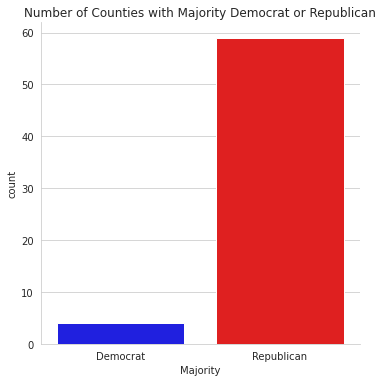

In [50]:
df80 = pres80_df.copy(deep = True)
df80 = af.get_maj_counties(df80)

### Scatter Plot of County Republican versus Democratic Votes

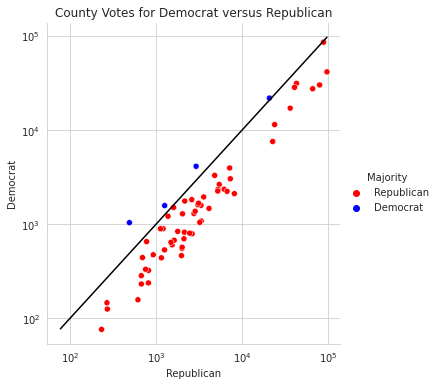

In [51]:
af.dem_vs_rep_scatter(df80)

### Top Twelve Counties by Vote Count, Majority 

(126, 3)


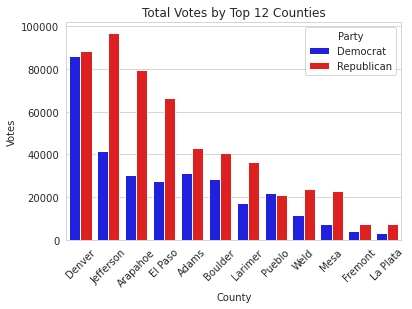

In [52]:
af.get_top_counties(df80, n = 12)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_1980_majority.p

Democratic majority counties: ['Las Animas', 'Costilla', 'Pueblo', 'Huerfano']


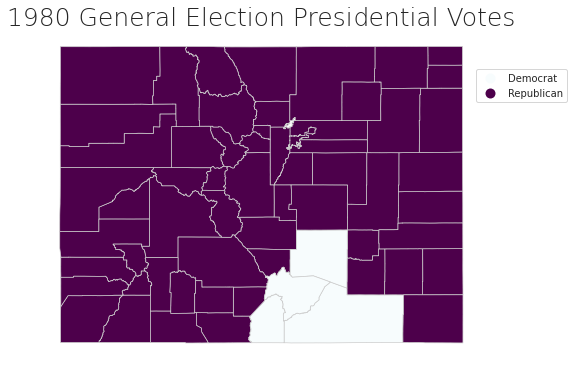

In [53]:
yr = "1980" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [54]:
import pickle
pickle.dump(pres80_df, open('../data/processed/abstracts/pres80_df.p', "wb"))

---
# 2020 General Election
## Presidential Voting Results in Colorado by County

### Tabulation of Party Votes by Party and Majority of Votes by County

In [55]:
# Define dataframe for status detail.
df_columns = ['County', 'Biden_Harris','Trump_Pence','Blankenship_Mohr','Hammons_Bodenstab','Hawkins_Walker','Huber_Atwood','Jorgensen_Cohen',
              'Carroll_Patel','Charles_Wallace','Collins_Parker','De_La_Fuente_Richardson','Hunter_Adams','Jacob-Fambro_Maryam','Kennedy_Jarrett',
              'Kishore_Santa_Cruz','Kopitke_Re-Vo-Sorenson','La_Riva_Freeman','McHugh_Storm','Pierce_Ballard','Scott_Tepool','West_Tidball']

# Read all rows and all columns and all columns, check that values read match 'CHECK' sum.
# At least one of the columns noted the wrong sum in the original abstract.
vote_cols = df_columns[1:]
df = pd.read_excel(file_dict[2020], sheet_name=0, header = None, index_col = None, skiprows = 1, 
                       usecols = range(len(df_columns)), names = df_columns)

for c in vote_cols:
    assert (df[c][:64].sum() == df[c][64]), f'Sum of votes for candidate and original do not match for {c}'
    
# Total Votes Cast for President

total_pres_votes = df.loc[:63,vote_cols].sum().sum()
county_pres_votes = df.loc[:63,vote_cols].sum(axis = 1)

# Going forward, we will rename the first two candidates "Democrat" and "Republican", respectively to conform with the previous abstracts.

pres2020_df = df.iloc[:64,0:6]
new_column_names = ['County', 'Democrat', 'Republican', 'Blankenship_Mohr', 'Hammons_Bodenstab', 'Hawkins_Walker']
pres2020_df.columns = new_column_names

print(pres2020_df.columns)
#print(f"President 2020: \n {tabulate(pres2020_df, headers=['County', 'Biden_Harris', 'Trump_Pence', 'Blankenship_Mohr', \
#                                                           'Hammons_Bodenstab', 'Hawkins_Walker'])}\n\n")

#county_pres_votes
df20 = pres2020_df.copy(deep = True)
df20['Reppct'] = df20['Republican'] / (df20['Republican'] + df20['Democrat']) * 100
df20['Dempct'] = df20['Democrat'] / (df20['Republican'] + df20['Democrat']) * 100
df20['Majority'] = 'Republican'
df20.loc[df20['Dempct'] > 50, 'Majority'] = 'Democrat'

print(f' Republican Majority: \n{tabulate(df20[df20["Reppct"] > 50], df20.columns)}\n\n')
print(f' Democrat Majority: \n{tabulate(df20[df20["Reppct"] < 50], df20.columns)}\n\n')

dem_votes = df20['Democrat'].sum()
rep_votes = df20['Republican'].sum()

dem_pct = dem_votes / (dem_votes + rep_votes) * 100
rep_pct = rep_votes / (dem_votes + rep_votes) * 100

print(f'Democrat:  {dem_votes} votes, {dem_pct:.2f}%')
print(f'Republican:  {rep_votes} votes, {rep_pct:.2f}%')

# Save Majority Report
df_maj_2020 = af.save_majority_report(df20, 2020)


Index(['County', 'Democrat', 'Republican', 'Blankenship_Mohr',
       'Hammons_Bodenstab', 'Hawkins_Walker'],
      dtype='object')
 Republican Majority: 
    County        Democrat    Republican    Blankenship_Mohr    Hammons_Bodenstab    Hawkins_Walker    Reppct    Dempct  Majority
--  ----------  ----------  ------------  ------------------  -------------------  ----------------  --------  --------  ----------
 1  Alamosa           3759          3813                  22                    6                23   50.3566   49.6434  Republican
 3  Archuleta         3738          5189                  20                    9                19   58.127    41.873   Republican
 4  Baca               317          1866                   2                    0                 3   85.4787   14.5213  Republican
 5  Bent               732          1503                   5                    0                 6   67.2483   32.7517  Republican
 9  Cheyenne           131           993               

### 2020 Majority by County

#### Winner 2020 General Election for President

Colorado will cast (if nothing crazy happens before now and December 14) its electoral votes for **Joseph Biden and Kamala Harris** for 2020.  The _Republicans_ had a total of **1,364,202** votes versus the _Democrat's_ **1,803,921**.  This represented **55%** to **42%.** split. 

#### Number of Counties of Democrat and Republican Majority

As we can see from the count plot below, most of the counties voted majority **Republican** again in this election.  The number of Republican majority counties in this election is **38** and the number of Democrat majority counties is **26**.

{'Republican Majority': 40, 'Democrat Majority': 24}


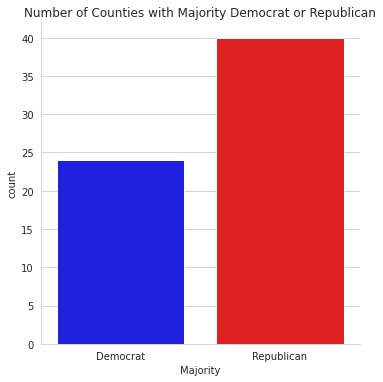

In [56]:
df20 = pres2020_df.copy(deep = True)
df20 = af.get_maj_counties(df20)

### Scatter Plot of County Republican versus Democratic Votes

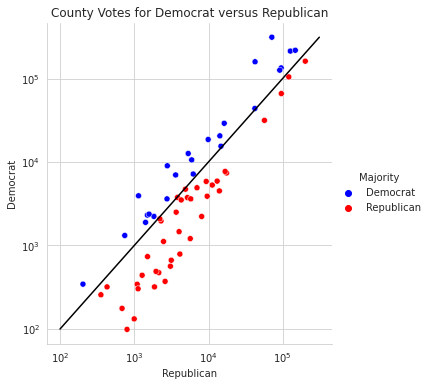

In [57]:
af.dem_vs_rep_scatter(df20)

### Top Twelve Counties by Vote Count, Majority 

(128, 3)


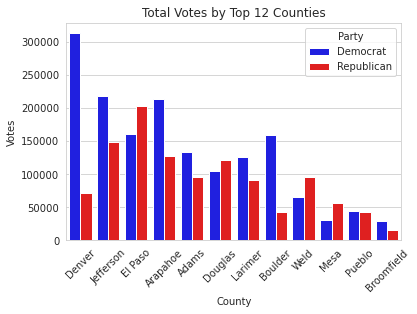

In [58]:
af.get_top_counties(df20, n = 12)

### General Election Presidential Results by County

Majority file name: ../data/processed/abstracts/co_2020_majority.p

Democratic majority counties: ['Larimer', 'Gunnison', 'Eagle', 'La Plata', 'Summit', 'Pitkin', 'Adams', 'Lake', 'Costilla', 'Garfield', 'Jefferson', 'San Miguel', 'Ouray', 'Saguache', 'Pueblo', 'Clear Creek', 'Boulder', 'Chaffee', 'San Juan', 'Routt', 'Gilpin', 'Denver', 'Arapahoe']


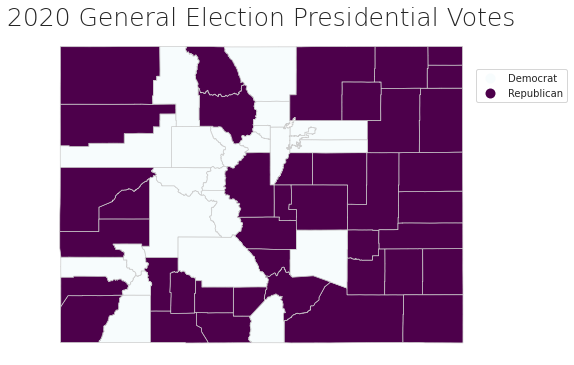

In [59]:
yr = "2020" 
fn = maj_dict[int(yr)]
print(f'Majority file name: {fn}\n')
dfi = cf.load_pickled_df(fn)
af.gen_colorado_red_blue_map(dfi, yr + " General Election Presidential Votes", yr)

In [60]:
import pickle
pickle.dump(pres2020_df, open('../data/processed/abstracts/pres2020_df.p', "wb"))